# Intro to Scientific Computing

## Jupyter

You are running a [Jupyter](https://jupyter.org/) Notebook. This is an interactive development environment where we can selectively run "cells". Cells can run code, provide documentation, display plots, and more. When you highlight a cell and click Shift+Enter, the cell "runs". Be careful, though --  you can run cells out of order!

## [numpy](https://numpy.org/)

`numpy` is an "array programming library". It allows us to perform mathematical operations efficiently on vectors, matrices, and higher-dimensional arrays. The fundamental component of `numpy` is the `array`. Remember that in machine learning we want an `X` feature matrix (the inputs to our model) and a `y` vector of ground truth. Generally, we will want to use `numpy` to construct `X` and `y`.

In [29]:
# Common convention is to rename numpy `np`.
import numpy as np

In [30]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [31]:
X.shape

(3, 3)

In [32]:
y = np.array([1, 2, 3])
y

array([1, 2, 3])

In [33]:
y.shape

(3,)

You can perform many linear algebra operations with `numpy`:

In [34]:
# Scaler operations
y * 2 + 1

array([3, 5, 7])

In [35]:
# Elementwise multiplication
X * X

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [36]:
# Matrix multiplication
X @ X

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [37]:
# Multiplication of vectors and matrices

In [38]:
# Create a 1-D column vector by using `reshape`
beta = np.array([0.1, 0.2, 0.3]).reshape(-1, 1)
beta.shape

(3, 1)

In [39]:
y_pred = X.dot(beta)

In [40]:
y_pred

array([[1.4],
       [3.2],
       [5. ]])

# [pandas](https://pandas.pydata.org/)

`pandas` is a data analysis library built on top of `numpy`. The fundamental component of `pandas` is the `DataFrame` which is similar to an Excel spreadsheet. You can alternatively think of it as a numpy matrix, where each row is a data point, and we have columns with names. `pandas` also has functionality for reading and writing data in different formats and plotting data.

I grabbed an actual housing dataset from [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview). The data consists of information about houses in Ames, Iowa, including the sale price of the house. The dataset is called `train.csv`, and it's located in the `data` folder that's above this notebook's folder. There is also a file called `data_description.txt` that contains information about the data. We can read that data from disk into a pandas `DataFrame`.

In [41]:
# Common convention is to rename pandas `pd`.
import pandas as pd

In [42]:
# Read the CSV file into a pandas dataframe
housing_data = pd.read_csv("../data/train.csv")
# Display the first 5 rows of the dataframe.
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


An individual row or column of a `DataFrame` is a `Series`. A `Series` is kind of like a one-dimensional `DataFrame`.

In [43]:
# Select the third row
housing_data.iloc[3]

Id                     4
MSSubClass            70
MSZoning              RL
LotFrontage         60.0
LotArea             9550
                  ...   
MoSold                 2
YrSold              2006
SaleType              WD
SaleCondition    Abnorml
SalePrice         140000
Name: 3, Length: 81, dtype: object

In [44]:
# Select the SalePrice column
housing_data["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [45]:
# Select multiple columns
housing_data[["SalePrice", "LotArea"]]

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


Similar to `numpy`, we can perform mathematical operations on the DataFrame.

In [46]:
housing_data["SalePrice"] * 2 + housing_data["LotArea"]

0       425450
1       372600
2       458250
3       289550
4       514260
         ...  
1455    357917
1456    433175
1457    542042
1458    293967
1459    304937
Length: 1460, dtype: int64

We can add and remove columns

In [47]:
housing_data["double_sale_price"] = housing_data["SalePrice"] * 2

In [48]:
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [49]:
"Street" in housing_data.columns

True

In [50]:
housing_data = housing_data.drop(columns=["Street"])

In [51]:
"Street" in housing_data.columns

False

We can also convert DataFrames and Series to numpy arrays

In [52]:
# Convert DataFrame to 2D array (i.e. a matrix)
housing_data[["SalePrice", "LotArea"]].values

array([[208500,   8450],
       [181500,   9600],
       [223500,  11250],
       ...,
       [266500,   9042],
       [142125,   9717],
       [147500,   9937]])

In [53]:
# Convert Series to a 1D array (i.e. a vector)
housing_data["SalePrice"].values

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

# [scikit-learn](https://scikit-learn.org/stable/)

`scikit-learn` is a library for performing machine learning in Python. This will be the primary library that we use this semester for training ML models. Recall that our constant goal is to construct the `X` feature matrix and the `y` vector of ground truth. In `scikit-learn`, you "fit" (aka train) your model with `X` and `y` as inputs. `X` and `y` can be numpy arrays, pandas DataFrames, or lists.

The `scikit-learn` process is to instantiate a model, `fit` it on `X` and `y`, and then `predict` using `X`.

Just like in the Week 1 slides, let's build a model to predict the sale price using the square footage of the house. There are different columns for each floor's square footage in our dataset, so we will add these all together to get a single column containing the total square footage:

In [54]:
# Reload clean housing data because we previously manipulated it.
housing_data = pd.read_csv("../data/train.csv")

In [55]:
housing_data["total_area"] = (
    housing_data["1stFlrSF"] 
    + housing_data["2ndFlrSF"] 
    + housing_data["TotalBsmtSF"]
)

We'll now generate a plot of the Square Footage versus the Sale Price. We'll use [matplotlib](https://matplotlib.org/) to generate the plot. This is a pretty confusing library to use, but it's the standard plotting libray in Python. We'll write a function for generating this plot because we will make this plot again later in the notebook.

In [56]:
# Common convention is to rename pyplot plt
# Most matplotlib commands come from pyplot.
import matplotlib.pyplot as plt
from matplotlib import ticker

# This cryptic line below is a "magic" command in jupyter to make the
# matplotlib plots high resolution
%config InlineBackend.figure_format = "retina"

In [57]:
# These commands adjust various font sizes in the matplotlib plots.
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 18

In [58]:
def plot_area_vs_price(housing_data):
    fig, ax = plt.subplots()
    ax.scatter(
        x=housing_data["total_area"], 
        y=housing_data["SalePrice"], 
        alpha=0.25, 
        edgecolors="none"
    )
    formatter = lambda x, pos: f"${int(x/1000):,}K"
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel("Sale Price")
    ax.set_xlabel("Total Area (Square Feet)")
    return ax

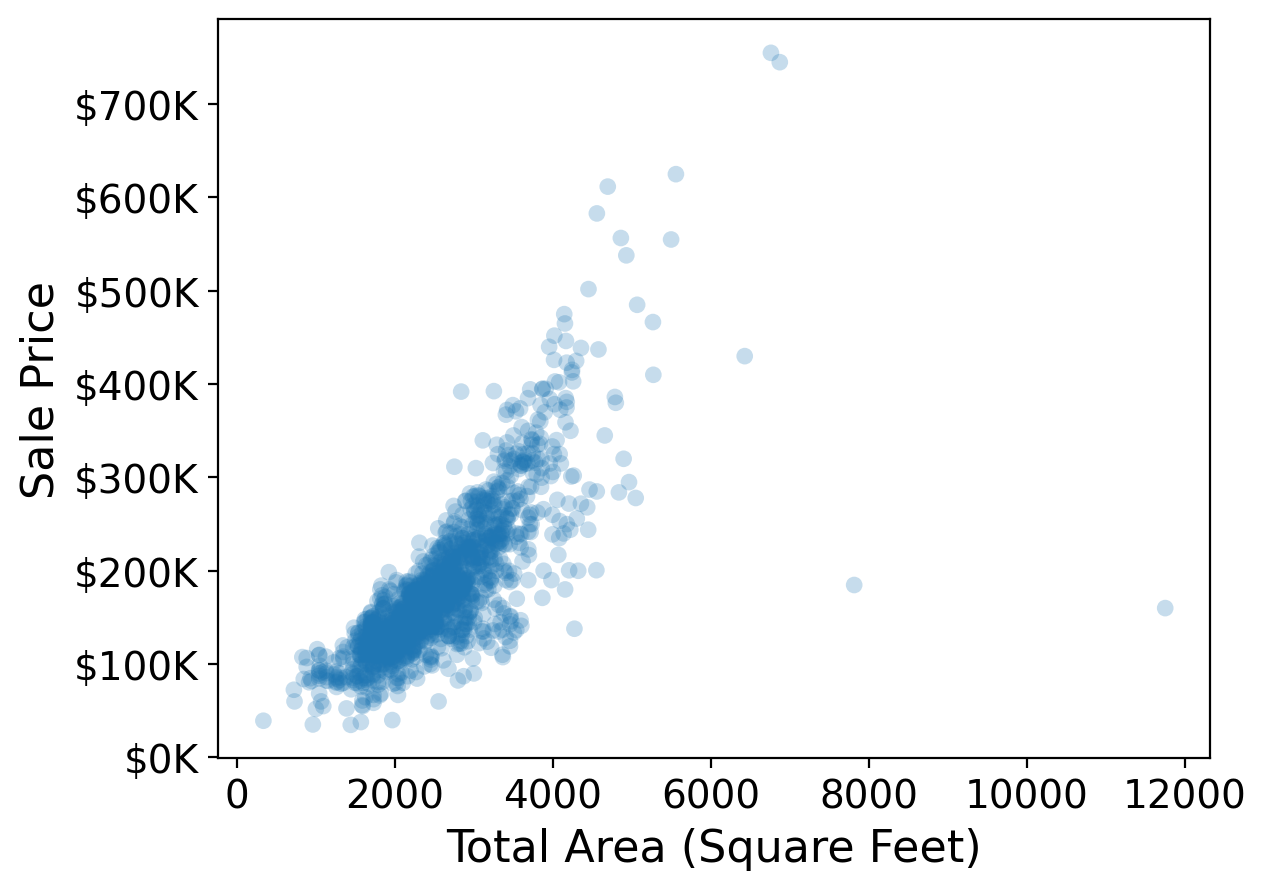

In [59]:
ax = plot_area_vs_price(housing_data)

Now, let's fit a linear model where the input is just the Total Area. Remember, the `scikit-learn` workflow is to create the model, and then fit it on `X` and `y`.

In [60]:
# While the name of the package is scikit-learn, you import it as sklearn.
from sklearn.linear_model import LinearRegression

In [61]:
# All scikit-learn models are classes, and we must instantiate them.
# Different models take different model-specific arguments. 
# Here, we make sure that we fit a y-intercept/bias term.
model = LinearRegression(fit_intercept=True)

In [62]:
# Construct our X and y
X = housing_data[["total_area"]]
y = housing_data["SalePrice"]

Note: scikit-learn expects `X` to be a 2D matrix (rows are samples, columns are features). Even though we only have a single feature, we selected the column from the DataFrame using double brackets. This ensures a 2D DataFrame is returned rather then a 1D Series. `y`, on the other hand, was selected using single brackets, and it's now a 1D Series.

In [63]:
print(f"X: type={type(X)}, shape={X.shape}")
print(f"y: type={type(y)}, shape={y.shape}")

X: type=<class 'pandas.core.frame.DataFrame'>, shape=(1460, 1)
y: type=<class 'pandas.core.series.Series'>, shape=(1460,)


Anyway, let's fit our model.

In [64]:
model = model.fit(X, y)

And let's generate predictions with the model on the same dataset that we fit it with.

In [65]:
predictions = model.predict(X)

We can plot our predictions alongside our original plot.

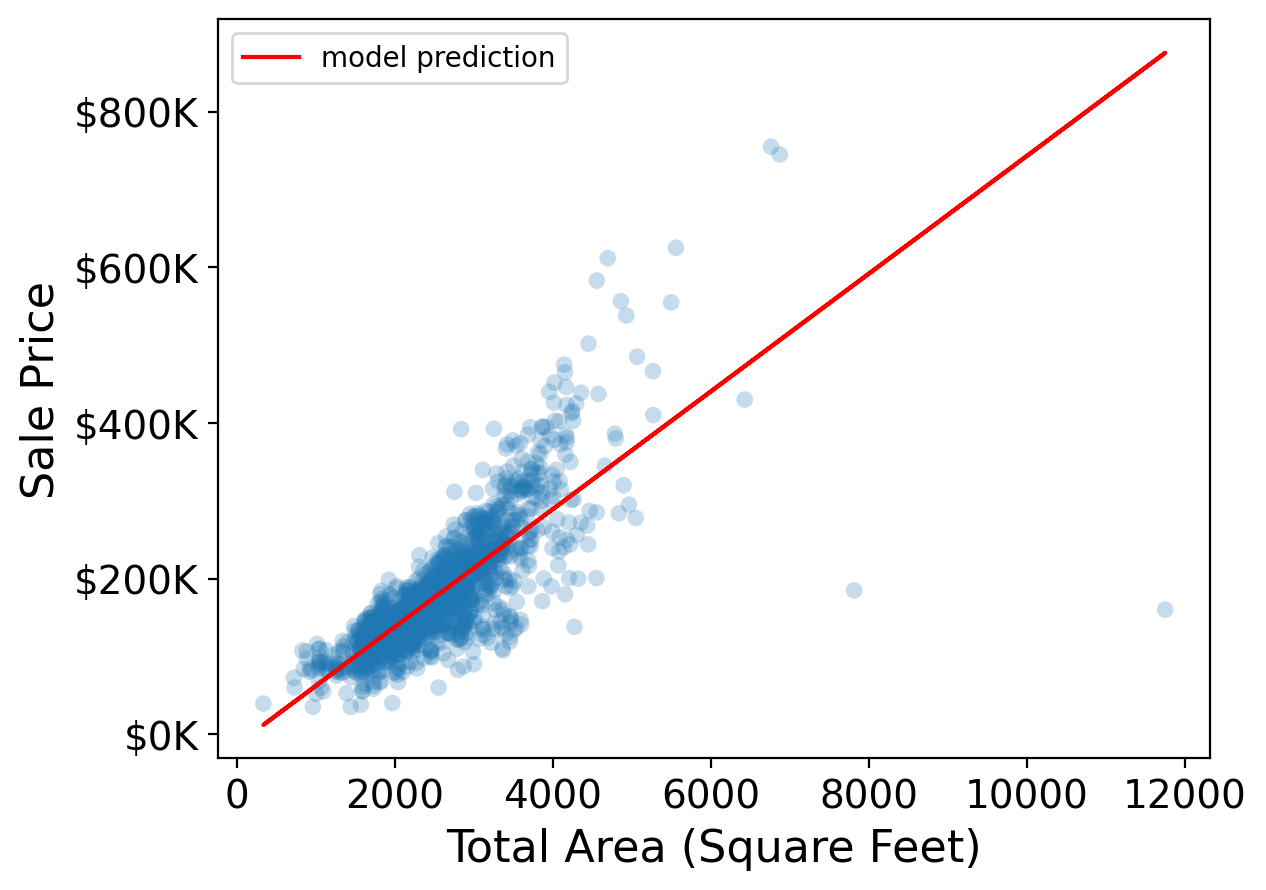

In [66]:
ax = plot_area_vs_price(housing_data)
ax.plot(X.values[:, 0], predictions, color="red", label="model prediction")
ax.legend()
None

We can also plot a comparison between the predicted sale price and the actual sale price.

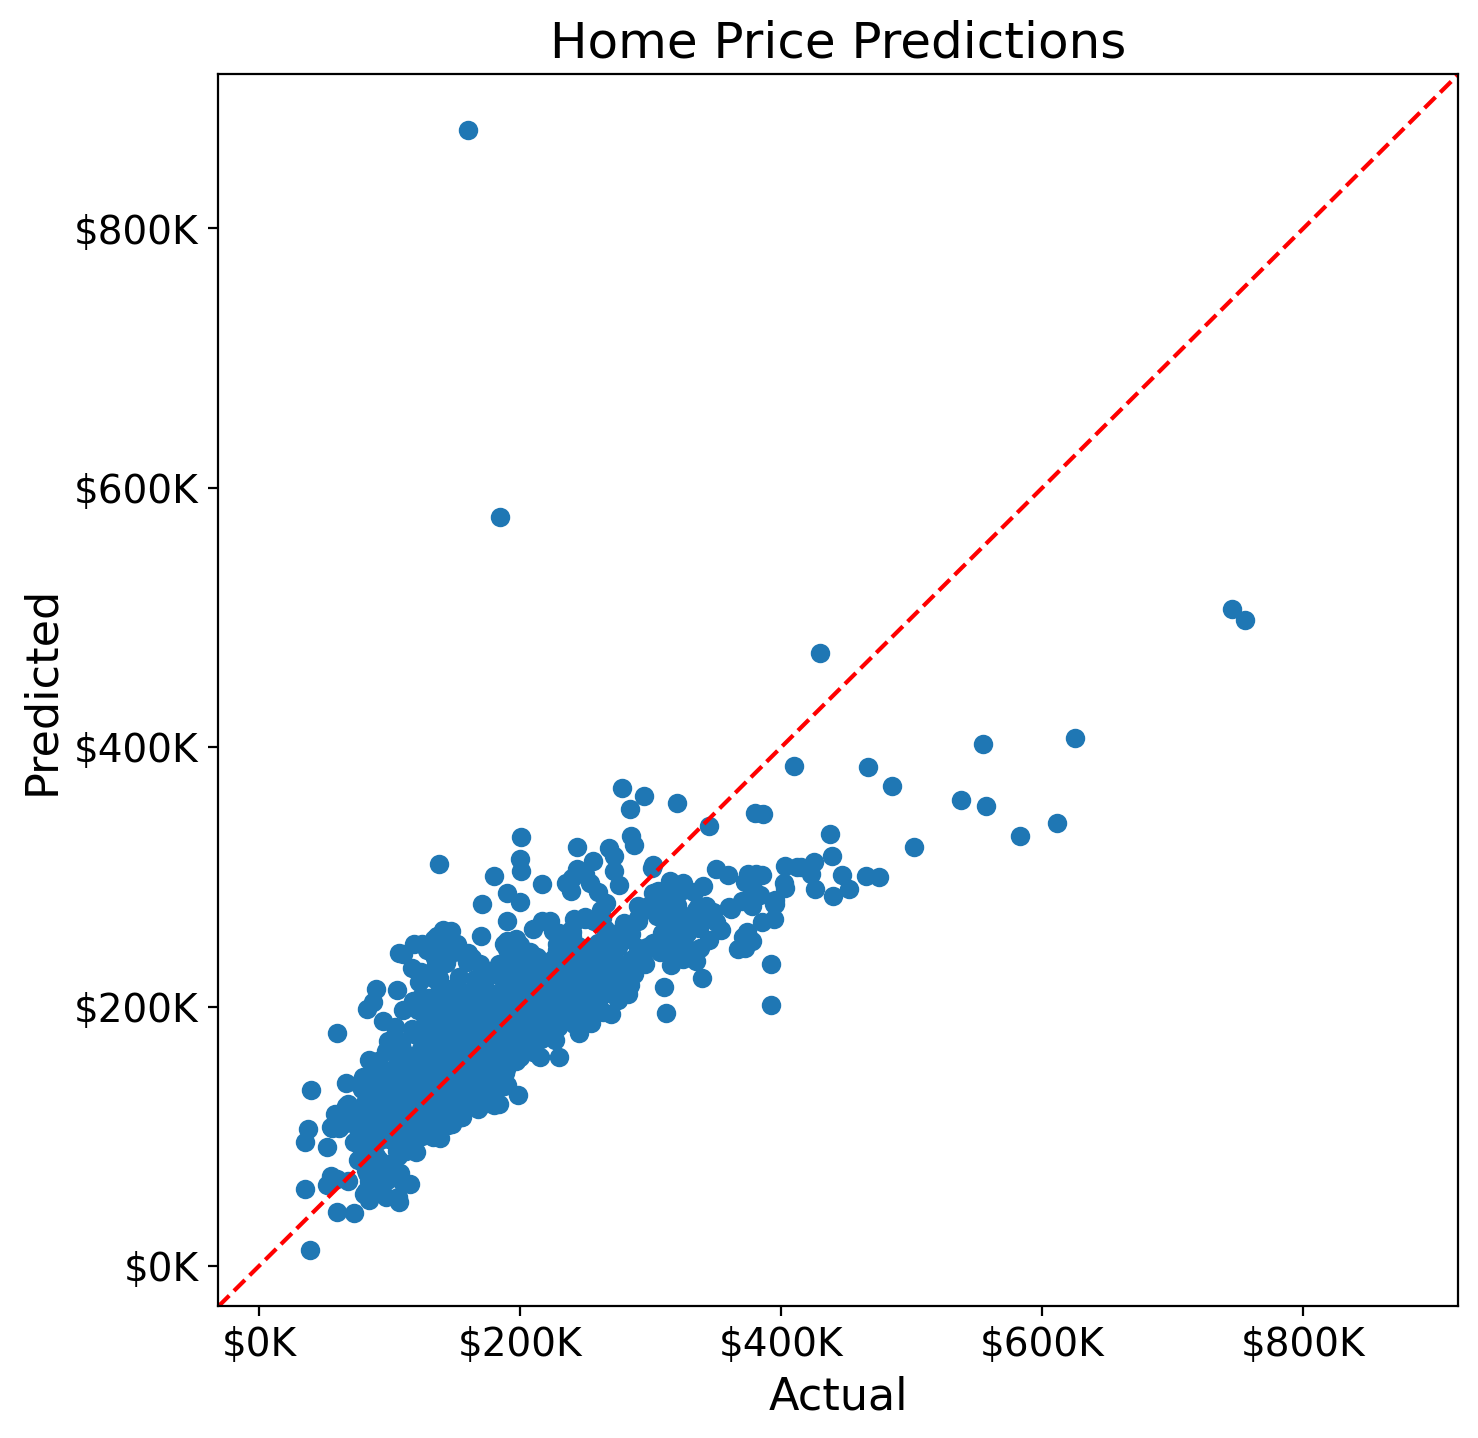

In [67]:
def comparison_plot(actual, predictions):

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(actual, predictions)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title("Home Price Predictions")

    formatter = lambda x, pos: f"${int(x/1000):,}K"
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)

    # Make the axis limits equal so that the figure
    # is perfectly square.
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    lim = (min(xmin, ymin), max(xmax, ymax))
    ax.set_xlim(lim)
    ax.set_ylim(lim)

    # Plot a 1:1 line to show where a perfect model's points would lie.
    line = np.linspace(lim[0], lim[1], 201)
    ax.plot(line, line, color="red", linestyle="dashed")
    return ax

ax = comparison_plot(y, predictions)

Lastly, let's calculate the $R^{2}$ for the model

In [68]:
from sklearn.metrics import r2_score

In [69]:
R2 = r2_score(y, predictions)
print(f"R^2 = {R2:4.3f}")

R^2 = 0.612
